<a href="https://colab.research.google.com/github/iitkgroup21/EE954_ASSIGNMENT_GR21/blob/anup_integration_2/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset
### Context

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

### Key Characteristics

* **Image Resolution:** Each image in the MNIST dataset is 28x28 pixels, with a single color channel (grayscale).
* **Number of Classes:** The dataset has 10 classes, representing the digits 0 through 9.
* **Color Format:** Grayscale (1 channel), with pixel values ranging from 0 to 255 in the raw data. After applying transforms.ToTensor(), these values are scaled between 0 and 1.

### Dataset Composition
* **Training Set:** 60,000 images, used for training models.
* **Test Set:** 10,000 images, used for evaluating model performance.

### Typical Usage
The dataset is often divided into three subsets for practical machine learning workflows:

* **Training Set (90% of the original training data)**: Used for training the model on 54,000 images.
* **Validation Set (10% of the original training data):** Used for tuning hyperparameters and preventing overfitting, with 6,000 images.
* **Test Set (100% of the original Testing data):** Used for final evaluation, with 10,000 images.

#### Labels

Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot


#### Transformation

* **ToTensor:** Converts each image to a PyTorch tensor and scales the pixel values to the range [0, 1].



## Basic concepts of CNN model :

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm that can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image, and be able to differentiate one from the other.

Three basic components to define a basic convolutional neural network.

*   The Convolutional Layer
*   The Pooling layer
*   The Output layer

![](https://media.licdn.com/dms/image/v2/D5612AQGOui8XZUZJSA/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1680532048475?e=1735776000&v=beta&t=Evq_XWpAo5JDVF4dy5tw2L8E7KDUgYwDrKtnTi5Go_I)





In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import torch

dataset_location = root = './data/'

ModuleNotFoundError: No module named 'torchsummary'

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from torchsummary import summary

In [35]:
training_dataset = datasets.FashionMNIST(dataset_location,
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.FashionMNIST(dataset_location,
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True)

In [10]:
print("training dataset length =", len(training_dataset))
print("test dataset length =", len(test_dataset))

training dataset length = 60000
test dataset length = 10000


In [36]:
#concatenate the data so that we can
combined_dataset = torch.utils.data.ConcatDataset([training_dataset, test_dataset])

#Initializing the ratios for the test, training and validation datasets
train_dataset_ratio = 0.9
validation_dataset_ratio = 0.1
test_dataset_ratio = 1.0 # This is applied to the full test data set

#Initalizing the new values of the training, testing and validation data sizes
train_dataset_size = int(train_dataset_ratio * len(training_dataset))
test_dataset_size = int(test_dataset_ratio * len(test_dataset))
validation_dataset_size = int(validation_dataset_ratio * len(training_dataset))

#create the datasets with the sizes

new_train_dataset, new_validation_dataset = torch.utils.data.random_split(training_dataset, [train_dataset_size, validation_dataset_size])
new_test_dataset = torch.utils.data.random_split(test_dataset, [test_dataset_size]) # This is a redundant step but will be useful if the ratios change

In [37]:
print(train_dataset_size)
print(test_dataset_size)
print(validation_dataset_size)
print(combined_dataset.cumulative_sizes)
print(len(new_train_dataset))
print(len(new_test_dataset))
print(len(new_validation_dataset))

54000
10000
6000
[60000, 70000]
54000
1
6000


In [38]:
sample_image, sample_label = new_train_dataset[0]
print("Min pixel value:", sample_image.min().item())
print("Max pixel value:", sample_image.max().item())


Min pixel value: 0.0
Max pixel value: 1.0


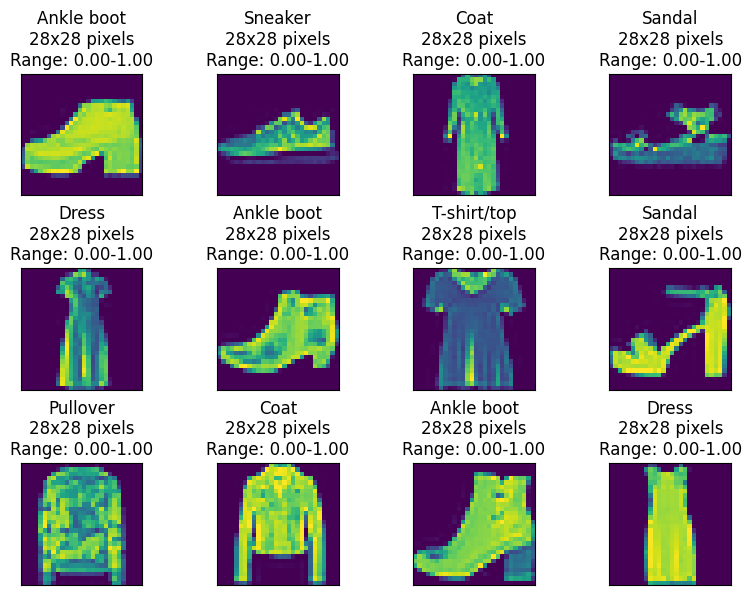

In [39]:

#Defining class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Displaying a 4x4 grid of the first 16 images in the dataset with pixel size and pixel range
plt.figure(figsize=(8, 8))  # Set the size of the figure
for i in range(12):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image, label = new_train_dataset[i]

    min_pixel = image.min().item()
    max_pixel = image.max().item()

    plt.imshow(image.reshape((28,28)).squeeze())
    #plt.imshow(image.squeeze())

    # Display the class name, pixel size, and pixel range in the title
    plt.title(f"{class_names[label]}\n28x28 pixels\nRange: {min_pixel:.2f}-{max_pixel:.2f}")

plt.tight_layout()
plt.subplots_adjust(hspace=0.6)
plt.show()  # Show the 6x6 grid


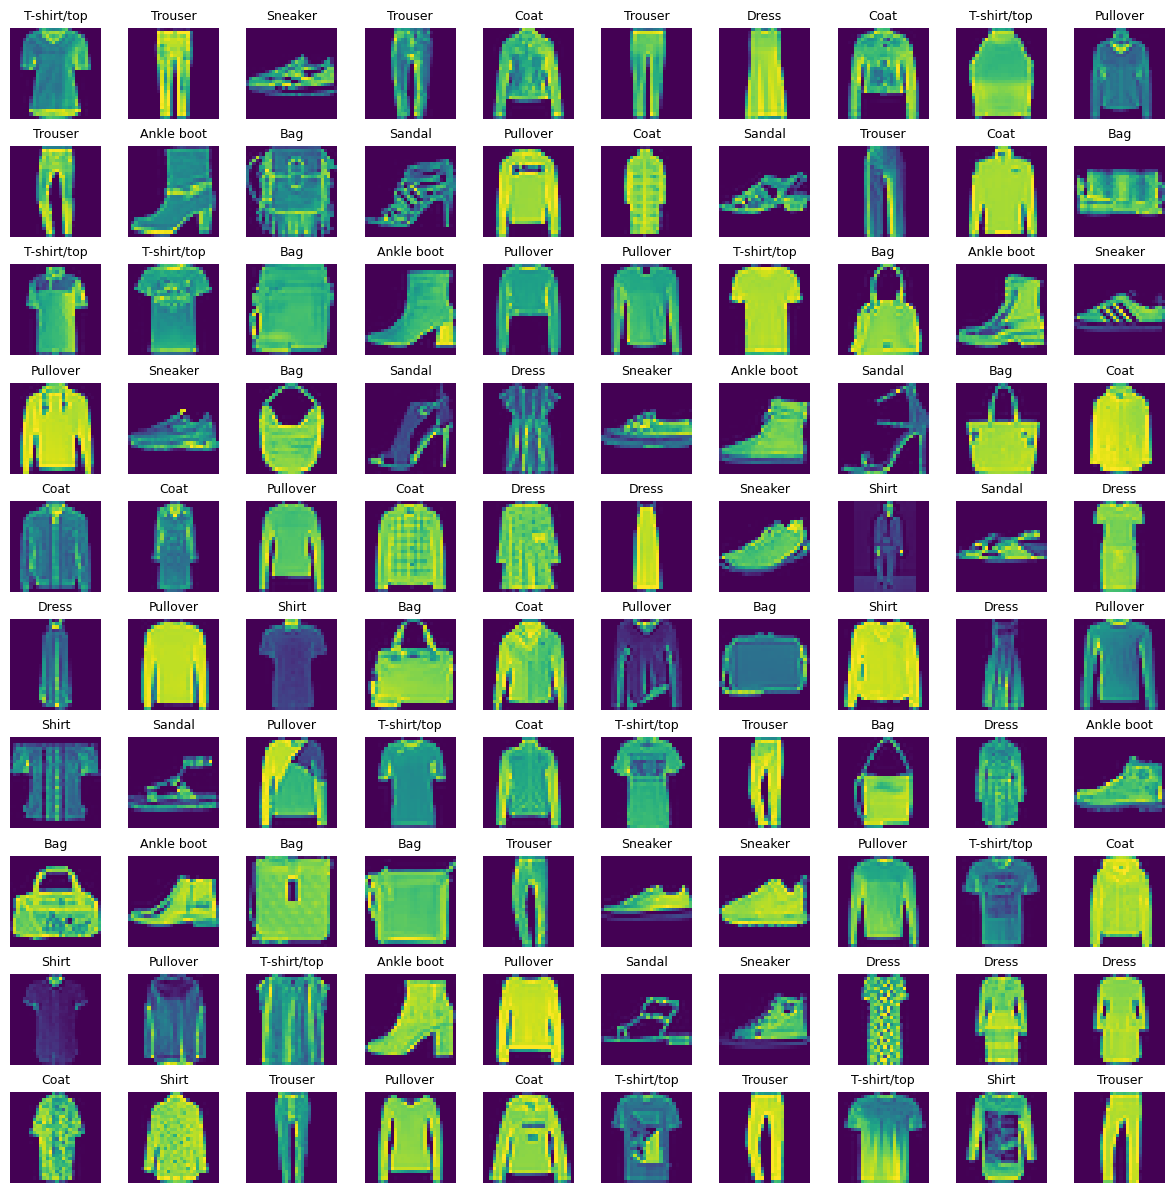

In [40]:
# Now, display a random 15x15 grid of images
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))
axes = axes.ravel() # Flatten the grid to make it easier to access each subplot, 2D to 1D
n_train = len(new_train_dataset)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train)
    sample_image, sample_label = new_train_dataset[index]
    axes[i].imshow(sample_image.reshape((28,28)))
    axes[i].set_title(class_names[sample_label], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [41]:
# Relu activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of Relu activation function
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [42]:
#Softmax function
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [43]:
class CustomModel(nn.Module):
     def __init__(self):
       super(CustomModel, self).__init__()
       self.conv_layer = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            )
     def forward(self, x):
            x = self.conv_layer(x)
            return x

In [44]:

model = CustomModel()
# Create a sample input tensor with shape (1, 1, 28, 28)
input_data = torch.randn(1, 1, 28, 28)
# Pass the input through the model#
cnn_output = model(input_data)
summary(model, input_size=(1, 28, 28))
# Print the output shape
print("Output shape:", cnn_output.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
       BatchNorm2d-2           [-1, 16, 28, 28]              32
              ReLU-3           [-1, 16, 28, 28]               0
         MaxPool2d-4           [-1, 16, 14, 14]               0
            Conv2d-5           [-1, 32, 14, 14]           4,640
       BatchNorm2d-6           [-1, 32, 14, 14]              64
              ReLU-7           [-1, 32, 14, 14]               0
         MaxPool2d-8             [-1, 32, 7, 7]               0
            Conv2d-9             [-1, 64, 7, 7]          18,496
      BatchNorm2d-10             [-1, 64, 7, 7]             128
             ReLU-11             [-1, 64, 7, 7]               0
        MaxPool2d-12             [-1, 64, 3, 3]               0
           Conv2d-13            [-1, 128, 3, 3]          73,856
      BatchNorm2d-14            [-1, 12

In [103]:
#Fully connected layer
class NeuralNetwork:

    def __init__(self):
      self.layers = []
      self.activation_functions = []
      self.layer_data = []

    def addnetwork(self, input_size, input_layers_config, output_layers_config):

      """
        - Add the first fully connected layer with the same shape as the flattened CNN output.
        - input_size (int): The size of the input layer.\n",
        - input_layers_config (list): A list of dictionaries specifying the configuration of input layers,
        - output_layers_config (list): A list of dictionaries specifying the configuration of output layers.
        - layers (list): A list to store the layers of the neural network.\n",
        - activation_functions (list): A list to store the activation functions for each layer.\n",

        Args:
        - input_size (int): The size of the input layer.
        - input_layers_config (list): A list of dictionaries specifying the configuration of input layers.
        - output_layers_config (list): A list of dictionaries specifying the configuration of output layers.

        Returns:
        - None

      """
      #addition the first layer
      neurons = input_size  # Same number of neurons as input size
      activation = 'relu'
      new_input_layers_config = []

      # Initialize weights and biases for the first layer
      weights = np.random.randn(input_size, neurons)
      bias = np.zeros((1, neurons))

      # Store layer information
      self.layer_data.append({
          "Layer": "First Layer",
          "Input Neurons": input_size,
          "Output Neurons": neurons,
          "Weights": weights.size,
          "Biases": bias.size,
          "Total Parameters": weights.size + bias.size
      })

      # Append weights, biases, and activation function to the model
      self.layers.append((weights, bias))
      self.activation_functions.append(activation)


      current_input_size = neurons

      # Addition of hidden layers
      #Initialize the weights and biases for the input layers
      for i, layer in enumerate(input_layers_config):
        neurons = layer['neurons']
        activation = layer['activation']

        # Initialize weights and biases for the current layer
        weights = np.random.randn(current_input_size, neurons)   # Weight initialization
        bias = np.zeros((1, neurons))  # Bias initialization

        # Store layer information
        self.layer_data.append({
          "Layer": f"Hidden Layer {i+1}",
          "Input Neurons": current_input_size,
          "Output Neurons": neurons,
          "Weights": weights.size,
          "Biases": bias.size,
          "Total Parameters": weights.size + bias.size
        })

        # Append weights, biases, and activation function to the model
        self.layers.append((weights, bias))
        self.activation_functions.append(activation)

        # Update current input size for next layer
        current_input_size = neurons

      # Addition of hidden layers
      # Initialize weights and biases for the output layer
      output_neurons = output_layers_config[0]['neurons']
      output_activation = output_layers_config[0]['activation']


      output_weights = np.random.randn(current_input_size, output_neurons)
      output_bias = np.zeros((1, output_neurons))

      self.layer_data.append({
          "Layer": "Output Layer",
          "Input Neurons": current_input_size,
          "Output Neurons": output_neurons,
          "Weights": output_weights.size,
          "Biases": output_bias.size,
          "Total Parameters": output_weights.size + output_bias.size
        })

      # Append output weights, biases, and activation function
      self.layers.append((output_weights, output_bias))
      self.activation_functions.append(output_activation)

    def display_parameters(self):

      """
      Return the parameters of each layer in a DataFrame format.

      Returns:
      - DataFrame: A pandas DataFrame containing parameter details for each layer.
      """
      df = pd.DataFrame(self.layer_data)
      return df

    def flatten(self, X):
      """
      Flatten the input data X.

      Args:
      - X (numpy.ndarray): The input data to be flattened.

      Returns:
      - numpy.ndarray: The flattened data.
      """

      batch_size = X.shape[0]

      #Flatten each image/sample to a 1D vector
      return X.reshape(batch_size, -1) # output(batch size, flattened size)

    def feedforward(self, X):
      """
      Perform a forward pass through the neural network.

      Args:
      - X (numpy.ndarray): The input to the network from CNN output.

      Returns:
      - yHat (numpy.ndarray): The output of the fully connected network.

      """
      for i, layer in enumerate(self.layers):
        # Extract weights and biases for the current layer
        weights, bias = layer

        # Matrix multiplication and bias addition
        X = np.dot(X, weights) + bias

        # Apply activation function
        if self.activation_functions[i] == 'relu':
            X = np.maximum(0, X)  # Using np.maximum for ReLU activation
        elif self.activation_functions[i] == 'softmax':
            exps = np.exp(X - np.max(X, axis=1, keepdims=True))
            X = exps / np.sum(exps, axis=1, keepdims=True)  # Softmax activation
            yHat = X

      return yHat
    def backward(self, X, y, learning_rate=0.01):
        m = X.shape[0]
        n_layers = len(self.layers)
    
        # Store activations and derivatives
        activations = []
        derivatives = []
    
        # Forward pass with stored values
        current_input = X
        activations.append(current_input)
    
        # Forward pass storing intermediate values
        for i, (weights, bias) in enumerate(self.layers):
            Z = np.dot(current_input, weights) + bias
            print(Z)
            if self.activation_functions[i] == 'relu':
                A = self.relu(Z)
                derivatives.append(self.relu_derivative(Z))
            elif self.activation_functions[i] == 'softmax':
                A = self.softmax(Z)
                derivatives.append(None)  # Special handling for softmax
            
            activations.append(A)
            current_input = A
    
        # Backward pass
        dA = activations[-1] - y  # Derivative of softmax with cross-entropy
    
        for i in range(n_layers - 1, -1, -1):
            if i == n_layers - 1:  # Output layer
                dZ = dA
            else:  # Hidden layers
                dZ = np.dot(dA, self.layers[i + 1][0].T) * derivatives[i]
        
            # Calculate gradients
            dW = np.dot(activations[i].T, dZ) / m
            db = np.sum(dZ, axis=0, keepdims=True) / m
        
            # Update weights and biases
            self.layers[i] = (
                self.layers[i][0] - learning_rate * dW,
                self.layers[i][1] - learning_rate * db
            )
        
            dA = dZ

    def compute_loss(self, yHat, y):
        # Cross-entropy loss
        m = y.shape[0]
        loss = -np.sum(y * np.log(yHat + 1e-9)) / m
        return loss
    def train(self, X_train, y_train, X_val, y_val, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward and backward pass, and weight updates for each batch
            yHat = self.feedforward(X_train)
            loss = self.compute_loss(yHat, y_train)
            self.backward(X_train, y_train, learning_rate)
            
            # Validation accuracy check (optional)
            val_pred = self.feedforward(X_val)
            val_loss = self.compute_loss(val_pred, y_val)
            val_accuracy = self.calculate_accuracy(val_pred, y_val)
            
            print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    def calculate_accuracy(self, yHat, y):
        # Calculate accuracy based on predictions and true labels
        pred_classes = np.argmax(yHat, axis=1)
        true_classes = np.argmax(y, axis=1)
        return np.mean(pred_classes == true_classes)

    @staticmethod
    def hyperparameter_search(X_train, y_train, X_val, y_val, param_grid,input_layers_config, output_layers_config):
        best_accuracy = 0
        best_params = None
        
        for params in param_grid:
            print(f"Testing configuration: {params}")
            model = NeuralNetwork()
            model.addnetwork(input_size=params['input_size'], input_layers_config=input_layers_config, output_layers_config=output_layers_config)

            
            model.train(
                model.flatten(X_train), y_train, model.flatten(X_val), y_val,
                epochs=params['epochs'],
                learning_rate=params['learning_rate']
            )
            
            # Evaluate on validation set
            val_pred = model.feedforward(X_val)
            val_accuracy = model.calculate_accuracy(val_pred, y_val)
            
            print(f"Validation Accuracy: {val_accuracy:.4f}")
            
            # Track the best configuration
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_params = params
        
        print(f"Best Configuration: {best_params}")
        print(f"Best Validation Accuracy: {best_accuracy:.4f}")
        
        return best_params, best_accuracy
    # Relu activation function
    @staticmethod
    def relu(x):
      return np.maximum(0, x)

    # Derivative of Relu activation function
    @staticmethod
    def relu_derivative(x):
      return np.where(x > 0, 1, 0)
    @staticmethod
    def softmax(x):
      exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
      return exp_x / np.sum(exp_x, axis=1, keepdims=True)



In [92]:
input_layers_config = [
    {'neurons': 128, 'activation': 'relu'},
    {'neurons': 32, 'activation': 'relu'},
    {'neurons': 16, 'activation': 'relu'}
]
output_layers_config = [
    {'neurons': 10, 'activation': 'softmax'}
]


In [68]:
#create dummy CNN output
import torch

dummy_cnn_output = torch.randn(32, 200)  # (batch_size, num_features)
print("Dummy CNN output shape:", dummy_cnn_output.shape)

Dummy CNN output shape: torch.Size([32, 200])


In [93]:
#Initialize the neural network with flexible layer configuration
nn_network = NeuralNetwork()
cnn_output_np = cnn_output.detach().numpy()
cnn_output_np=nn_network.flatten(cnn_output_np)  # Flatten the CNN output
nn_network.addnetwork(input_size=cnn_output_np.shape[1], input_layers_config=input_layers_config, output_layers_config=output_layers_config)

output = nn_network.feedforward(cnn_output_np)

# Retrieve and display the parameter DataFrame
df = nn_network.display_parameters()
print("Parameter Table for Neural Network:")
print(df)

[[0.         0.         0.         ... 0.         0.28853643 0.3189246 ]]
Parameter Table for Neural Network:
            Layer  Input Neurons  Output Neurons  Weights  Biases  \
0     First Layer           2304            2304  5308416    2304   
1  Hidden Layer 1           2304             128   294912     128   
2  Hidden Layer 2            128              32     4096      32   
3  Hidden Layer 3             32              16      512      16   
4    Output Layer             16              10      160      10   

   Total Parameters  
0           5310720  
1            295040  
2              4128  
3               528  
4               170  


In [104]:
# Convert validation set to numpy arrays for easy handling with the NeuralNetwork class
# Using DataLoader for batch processing if needed
val_loader = DataLoader(new_validation_dataset, batch_size=len(new_validation_dataset))
X_val, y_val = next(iter(val_loader))  # Get entire validation set in one batch
X_val = X_val.view(len(X_val), -1).numpy()  # Flatten and convert to numpy array
y_val = torch.nn.functional.one_hot(y_val, num_classes=10).numpy()  # One-hot encode labels


# Convert validation set to numpy arrays for easy handling with the NeuralNetwork class
# Using DataLoader for batch processing if needed
train_loader = DataLoader(new_train_dataset, batch_size=len(new_train_dataset))
X_train, y_train = next(iter(train_loader))  # Get entire validation set in one batch
X_train = X_train.view(len(X_train), -1).numpy()  # Flatten and convert to numpy array
y_train = torch.nn.functional.one_hot(y_train, num_classes=10).numpy()  # One-hot encode labels

# Define parameter grid for hyperparameter search
param_grid = [
    {'input_size': X_val.shape[1], 'epochs': 10, 'learning_rate': 0.01},
    {'input_size': X_val.shape[1], 'epochs': 20, 'learning_rate': 0.001},
    {'input_size': X_val.shape[1], 'epochs': 30, 'learning_rate': 0.005}
]
# Perform hyperparameter search
best_params, best_accuracy = NeuralNetwork.hyperparameter_search(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, param_grid=param_grid,input_layers_config=input_layers_config,output_layers_config=output_layers_config)

print(f"Best hyperparameters: {best_params}")
print(f"Best validation accuracy: {best_accuracy:.4f}")


Testing configuration: {'input_size': 784, 'epochs': 10, 'learning_rate': 0.01}
[[  7.12180703  10.60275534   9.45233608 ...   4.21336958  11.24734451
   -3.34216164]
 [  4.28315242   0.43112056  10.97821454 ... -15.43198848   6.5390594
   -3.73266255]
 [ 11.65557143  27.74365257  20.66459851 ... -14.02526722  10.52765363
   -1.50624251]
 ...
 [  1.89752674  16.94599684  13.22893917 ...  -0.86222806  22.86637048
   -0.23751857]
 [ 19.55493248  27.38525995  19.23588223 ... -24.56941547  18.54072915
    1.53030416]
 [-12.47681773  36.05309294  26.25642693 ... -31.29461651  23.77258459
    5.1226241 ]]
[[-114.8009899  -353.3023595  -154.08500823 ...   11.14722736
  -193.2552616  -188.70135401]
 [ 207.07654921 -448.36962229 -137.60804072 ...  365.67263634
     7.0611863  -405.96563289]
 [-272.51498869 -448.6605189  -381.15212535 ...  230.76641841
  -604.72818041 -235.2163001 ]
 ...
 [ -43.57437312 -377.03171238  -66.75819987 ...  183.41967026
  -371.67169011 -201.51017695]
 [-192.7779677  

/var/folders/b6/hjwkbmlx0h33h8hjnv1xlx4h0000gn/T/ipykernel_74564/2310859082.py:190: RuntimeWarning: invalid value encountered in multiply
  dZ = np.dot(dA, self.layers[i + 1][0].T) * derivatives[i]


Epoch 2/30, Train Loss: 18.6958, Val Loss: nan, Val Accuracy: 0.0978
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [n